In [73]:
import gensim
import pandas as pd
import re
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.manifold import TSNE

In [74]:
#Import Dataset And Choose The Comment Body
data = pd.read_csv("../../../data/2014.csv",nrows = 10000)
data=pd.DataFrame(data,columns=['body'])
data

,body
0,One of us\n\nOne of us\n\nOne of us
1,I wasn't thinking straight. I was blacked out ...
2,Yeah I tend to over do xanax and adderal at ti...
3,I don't think the whole 'addictive personality...
4,Yep pretty much. Up to long on Adderal turned ...
...,...
9995,"“Sometimes, I think I should just run away. Bu..."
9996,I basically put those in that cup after i used...
9997,Behold!\n\nhttps://www.butrans.com/\n\nIt come...
9998,Like I said with someone else... When you're d...


In [75]:
#Drop Null Value
data.dropna()

,body
0,One of us\n\nOne of us\n\nOne of us
1,I wasn't thinking straight. I was blacked out ...
2,Yeah I tend to over do xanax and adderal at ti...
3,I don't think the whole 'addictive personality...
4,Yep pretty much. Up to long on Adderal turned ...
...,...
9995,"“Sometimes, I think I should just run away. Bu..."
9996,I basically put those in that cup after i used...
9997,Behold!\n\nhttps://www.butrans.com/\n\nIt come...
9998,Like I said with someone else... When you're d...


In [76]:
#Elimate ppercase letter, punctuation,emoji and extra spaces.
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^\w\s]','', text)  # Remove punctuation and emoji
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

data=pd.DataFrame(data['body'].map(preprocess_text))
#Drop the deleted value
data=data[ data['body'].str.contains( 'deleted' )==False ]
data.reset_index(drop=True, inplace= True)
data

,body
0,one of us one of us one of us
1,i wasnt thinking straight i was blacked out on...
2,yeah i tend to over do xanax and adderal at ti...
3,i dont think the whole addictive personality t...
4,yep pretty much up to long on adderal turned m...
...,...
9198,sometimes i think i should just run away but w...
9199,i basically put those in that cup after i used...
9200,behold httpswwwbutranscom it comes in 5mcg 10m...
9201,like i said with someone else when youre deali...


In [77]:
#Create  CORPUS
wordlist = data['body']
newlist=[]
for w in range(0,len(wordlist)-1):
    newlist.append(wordlist[w].split())

In [78]:
#Create Word2Vec Model
model = Word2Vec(sentences=newlist, window=4, min_count=1, workers=4)

In [79]:
print(model)
model.save('model.bin')

Word2Vec<vocab=17446, vector_size=100, alpha=0.025>


In [80]:
#General View Of The Model
model.wv.index_to_key

['i',
 'the',
 'to',
 'a',
 'and',
 'you',
 'it',
 'of',
 'that',
 'in',
 'is',
 'for',
 'my',
 'but',
 'on',
 'was',
 'just',
 'have',
 'with',
 'if',
 'me',
 'be',
 'like',
 'so',
 'this',
 'im',
 'not',
 'your',
 'its',
 'get',
 'or',
 'are',
 'up',
 'as',
 'they',
 'dont',
 'all',
 'out',
 'do',
 'at',
 'about',
 'what',
 'can',
 'when',
 'would',
 'he',
 'from',
 'some',
 'know',
 'them',
 'had',
 'no',
 'one',
 'really',
 'ive',
 'time',
 'good',
 'there',
 'an',
 'shit',
 'people',
 'think',
 'more',
 'then',
 'how',
 'will',
 'got',
 'much',
 'even',
 'thats',
 'only',
 'because',
 'never',
 'youre',
 'been',
 'take',
 'now',
 'day',
 'than',
 'way',
 'too',
 'go',
 'dope',
 'feel',
 'well',
 'high',
 'going',
 'make',
 'off',
 'back',
 'use',
 'could',
 'were',
 'we',
 'lol',
 'any',
 'here',
 'also',
 'right',
 'did',
 'still',
 'want',
 'being',
 'man',
 'him',
 'though',
 'by',
 'didnt',
 'sure',
 'after',
 'her',
 'has',
 'she',
 'into',
 'yeah',
 'his',
 'cant',
 'who',
 

In [81]:
model.wv.get_normed_vectors()

array([[-0.04135354,  0.06758299,  0.11394896, ..., -0.09043548,
        -0.0646996 ,  0.04404761],
       [-0.12335376,  0.17134568,  0.06259348, ..., -0.10950443,
        -0.02706207, -0.00027645],
       [-0.00273547,  0.04160876, -0.08148781, ..., -0.00398716,
        -0.01364831, -0.1313451 ],
       ...,
       [ 0.00738982,  0.11644571,  0.00954439, ..., -0.1193871 ,
         0.0241294 , -0.03586635],
       [-0.05143791,  0.14951646, -0.00906727, ..., -0.01135707,
         0.1254795 ,  0.06834684],
       [ 0.01791285,  0.16871105, -0.05620419, ..., -0.06661494,
        -0.0489333 , -0.01954144]], dtype=float32)

In [82]:
#100 Closest Word to 'herion'
model.wv.most_similar(positive='herion',topn=100)

[('lice', 0.8335118889808655),
 ('understanding', 0.8331635594367981),
 ('morph', 0.8328965306282043),
 ('bomb', 0.8319283127784729),
 ('strictly', 0.8301572203636169),
 ('retarded', 0.8298625946044922),
 ('perfect', 0.8293793797492981),
 ('exact', 0.8290258049964905),
 ('standards', 0.828213632106781),
 ('pricey', 0.8281847238540649),
 ('website', 0.8280924558639526),
 ('adults', 0.8276550769805908),
 ('incredible', 0.8267377018928528),
 ('media', 0.8262548446655273),
 ('annoying', 0.826130211353302),
 ('hilarious', 0.8258793354034424),
 ('aware', 0.8258752822875977),
 ('jelly', 0.825522243976593),
 ('absurd', 0.8252760171890259),
 ('sounding', 0.8237927556037903),
 ('85', 0.8227707743644714),
 ('terrible', 0.8224965929985046),
 ('obvious', 0.8221967220306396),
 ('bioavailability', 0.8219020366668701),
 ('bruised', 0.8218659162521362),
 ('involved', 0.8214664459228516),
 ('yah', 0.8208048343658447),
 ('unreal', 0.8205991983413696),
 ('scary', 0.8205599784851074),
 ('available', 0.8204

In [83]:
#ViVisualization
nearWords = ['heroin','diamorphine','methamphetamine','dopes','fentanyl','antagonists','suboxone',"codeine"]
X=[]
for x in nearWords:
    X.append(model.wv.get_vector("x", norm=True))
X = np.array(X)



In [87]:
tsne = TSNE(n_components=2, random_state=0, perplexity = 7)
result = tsne.fit_transform(X)

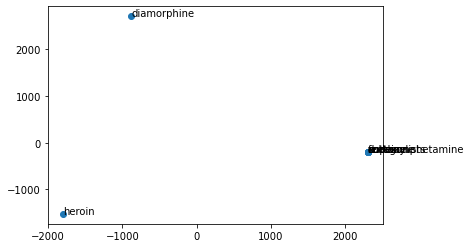

In [88]:
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(nearWords):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()